In [540]:
# this is the last notebook for this project (highlight)

In [1]:
#global imports
import pandas as pd
import importlib
import numpy as np

from sklearn.model_selection import train_test_split


#private imports
import wordembedding_hebrew.word2vec as word2vec
#from baseline_func import *
#from word2vec_myfunc import *
#from stopwords import *

# load dataset 

In [2]:
premetives_features_dataset=pd.read_pickle('dataset.pkl')
premetives_features_dataset.head(2)

,word_count,distinct_word_count,avg_chars_per_word,TTR,Flesch_Kincaid,h_hayedia_count,syllabls_count,uncertainty_words_usage,first_names_usage,last_names_usage,...,BEINONI,PAST,FUTURE,IMPERATIVE,qoutes_count,hashtag_count,positive_semantic,negative_semantic,objective_semantic,score_code
0,18,18,4.388889,1.000000,18.444286,0.040000,45,0,4,3,...,0,3,0,0,0,0,0.980871,0.012410,0.006719,1.0
1,57,52,4.052632,0.912281,-36.092930,0.072289,164,0,3,6,...,0,2,0,0,0,0,0.615095,0.309213,0.075692,0.5


In [3]:
original_full_ds = pd.read_pickle('full_ds_after_prepro.pkl')
original_full_ds.head(2)

,score,original_stmt,stmt,stopwords,stmt_without_stopwords,tokenized_stmt,stemmed_stmt,stmt_lemmas,all_pos,all_dependecies_parts,gram_person,verbs_tense
0,untrue,דיברו על 600 מיליארד. נתניהו אמר מאות מיליארדי...,דיברו על 600 מיליארד. נתניהו אמר מאות מיליארדי...,"[על, נתניהו, אמר, מאות, ועכשיו, בעצם, זה, וגם,...",דיברו 600 מיליארד. מיליארדים. ירד ל 17 מיליארד...,דיברו על 600 מיליארד . נתניהו אמר מאות מיליארד...,דיברו על 600 מיליארד . נתניהו אמר מאות מיליארד...,דיבר על 600 מיליארד . נתניהו אמר מאה מיליארד ....,"[VB, IN, CD, CD, yyDOT, NNP, VB, CD, CD, yyDOT...","[ROOT, comp, pobj, nn, punct, subj, ROOT, dep,...","[3, 3, 3, 3, 3, A]","[PAST, PAST, PAST]"
1,half true,נתניהו אמר מאות מיליארדים. ועכשיו בעצם זה ירד ...,נתניהו אמר מאות מיליארדים. ועכשיו בעצם זה ירד ...,"[נתניהו, אמר, מאות, ועכשיו, בעצם, זה, השני, את...",מיליארדים. ירד ל 17 מיליארד . בכיס משלמים זה. ...,נתניהו אמר מאות מיליארדים . ועכשיו בעצם זה ירד...,נתניהו אמר מאות מיליארדים . ו עכשיו בעצם זה יר...,נתניהו אמר מאה מיליארד . ו עכשיו בעצם זה ירד ל...,"[NNP, VB, CD, CD, yyDOT, CONJ, RB, RB, PRP, VB...","[subj, ROOT, dep, nn, punct, cc, advmod, parat...","[3, 3, 3, 2, A, 3, 1, A, 3, 3, A, 2, A, 3]","[PAST, PAST]"


# load model

In [4]:
#load word2vec model (trained before)
word2vec_model = word2vec.getModel()

In [5]:
#lemmatize(maybe try later only tokenize) and remove stop words from dataset 

# create sentences embedding feature

In [6]:
#shape of word embedding vector (word2vec)
#word2vec_model[''].shape

In [6]:
#avarage sentence vector by words vectors
from neuron_models_func import create_sentence_avg_vector

In [7]:
#vectorize lemmas using word2vec model
word2vec=original_full_ds['stmt_lemmas'].apply(lambda x : create_sentence_avg_vector(x,word2vec_model))

In [8]:
#concat dataset with stmt embedding vectors
dataset=pd.concat([original_full_ds,word2vec], axis=1)

In [9]:
pre_and_embed_dataset=pd.concat([premetives_features_dataset,word2vec],axis=1)
pre_and_embed_dataset.head(2)

,word_count,distinct_word_count,avg_chars_per_word,TTR,Flesch_Kincaid,h_hayedia_count,syllabls_count,uncertainty_words_usage,first_names_usage,last_names_usage,...,90,91,92,93,94,95,96,97,98,99
0,18,18,4.388889,1.000000,18.444286,0.040000,45,0,4,3,...,0.030844,-0.040579,0.072697,-0.035791,-0.027364,-0.032712,0.002052,-0.046226,0.004211,0.054746
1,57,52,4.052632,0.912281,-36.092930,0.072289,164,0,3,6,...,0.013829,-0.086772,0.069097,-0.054877,-0.003619,-0.042879,0.024840,-0.030202,-0.008577,0.032319


In [10]:
#keep sentence(stmt) vector embedding and remove all other column(features)
dst=dataset[dataset.columns[-100:]]
dst.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.066762,0.041613,0.174446,0.000813,0.010661,-0.003396,0.204404,-0.016948,0.011024,0.000576,...,0.030844,-0.040579,0.072697,-0.035791,-0.027364,-0.032712,0.002052,-0.046226,0.004211,0.054746
1,0.037679,0.075402,0.144055,0.035363,0.020485,-0.038484,0.156943,0.029304,0.018376,0.007029,...,0.013829,-0.086772,0.069097,-0.054877,-0.003619,-0.042879,0.024840,-0.030202,-0.008577,0.032319


In [11]:
label=dataset['score']
label

0         untrue
1      half true
2      half true
3         untrue
4         untrue
         ...    
472         TRUE
473         TRUE
474         TRUE
475         TRUE
476         TRUE
Name: score, Length: 477, dtype: object

# keras mlp - prepare

#stages:
1. one hot encoding
2.

In [13]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding,TimeDistributed
from keras.layers import LSTM,Bidirectional,Input,Flatten
import tensorflow as tf
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.layers import SpatialDropout1D,GaussianNoise
from keras.callbacks import EarlyStopping
import keras.layers
from keras.regularizers import l1
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from matplotlib import pyplot
import numpy
from sklearn.utils import class_weight
from tensorflow.keras.models import model_from_json
#private
from model_statistics_func import plot_confusion_matrix,get_feature_importance
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,classification_report,roc_auc_score,f1_score,precision_recall_fscore_support


from model_statistics_func import plot_confusion_matrix,get_feature_importance


Using TensorFlow backend.


In [783]:
import re
def remove_all_single_char_words(stmt):
    return re.sub(r'\b\w{1,1}\b', ' ', stmt)

In [35]:
def convert_score_cat_to_numeric_old(score):
    score_dict={'TRUE':0,'mostly true':0.2,'half true':0.5,'misleading':0.7,'mostly untrue':0.8,'untrue':1}
    return score_dict.get(score)

In [14]:
from neuron_models_func import convert_score_cat_to_numeric

In [796]:
label=label.apply(lambda x: convert_score_cat_to_numeric(x))

In [785]:
#lemmas list
lemmas_list=' '.join(dataset.stmt_lemmas.apply(lambda x: remove_all_single_char_words(x)).to_list()).split()
lemmas_list=list(set(lemmas_list))
dataset['new_stmt_lemmas']=dataset.stmt_lemmas.apply(lambda x: remove_all_single_char_words(x))
len(lemmas_list)

2272

In [789]:
t = Tokenizer()
t.fit_on_texts(lemmas_list)
encoded_sntc=t.texts_to_sequences(dataset.new_stmt_lemmas.to_list())

In [790]:
max_length = 100
dst = pad_sequences(encoded_sntc, maxlen=max_length, padding='post')

In [791]:
vocab_size=len(lemmas_list)

In [792]:
# get the embedding matrix from the embedding layer
from numpy import zeros
count=0
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    try:
        embedding_vector = word2vec_model.wv.get_vector(word)
        if embedding_vector is not None:
              embedding_matrix[i] = embedding_vector
    except: 
        count=count+1
count

158

In [ ]:
pretrained_weights = word2vec_model.wv.syn0
vocab_size, emdedding_size = pretrained_weights.shape

print('Result embedding shape:', pretrained_weights.shape)

In [370]:
pretrained_weights.shape

(515505, 100)

In [797]:
label

0      1.0
1      0.5
2      0.5
3      1.0
4      1.0
      ... 
472    0.0
473    0.0
474    0.0
475    0.0
476    0.0
Name: score, Length: 477, dtype: float64

In [798]:
encoder = LabelEncoder()
label_new=encoder.fit_transform(label)

In [799]:
dst

array([[ 680,    8, 1538, ...,    0,    0,    0],
       [1105, 1060,  800, ...,    0,    0,    0],
       [ 834, 1174, 1953, ...,    0,    0,    0],
       ...,
       [2096,  279, 2101, ...,    0,    0,    0],
       [1362, 1421,  422, ...,    0,    0,    0],
       [1259,  577, 1829, ...,    0,    0,    0]])

In [800]:
label_new

array([5, 2, 2, 5, 5, 4, 0, 1, 0, 5, 4, 5, 5, 1, 2, 4, 2, 1, 5, 5, 5, 5,
       5, 5, 4, 4, 5, 4, 2, 5, 5, 5, 5, 4, 5, 2, 5, 1, 2, 5, 2, 5, 5, 0,
       5, 1, 1, 5, 5, 5, 0, 4, 0, 4, 3, 3, 1, 0, 1, 4, 4, 5, 4, 4, 5, 0,
       5, 5, 5, 4, 5, 5, 4, 4, 4, 2, 4, 2, 5, 5, 2, 5, 5, 5, 5, 5, 4, 0,
       3, 5, 4, 0, 5, 1, 5, 3, 1, 5, 5, 4, 5, 4, 5, 5, 4, 4, 2, 2, 0, 2,
       2, 4, 5, 5, 4, 5, 5, 5, 4, 5, 0, 4, 5, 2, 1, 4, 4, 5, 0, 5, 5, 5,
       5, 5, 5, 4, 4, 4, 4, 1, 4, 4, 5, 4, 5, 5, 0, 5, 5, 2, 1, 4, 5, 5,
       2, 2, 4, 0, 5, 5, 2, 5, 5, 5, 5, 5, 4, 5, 5, 0, 5, 5, 5, 5, 5, 5,
       5, 2, 4, 1, 2, 2, 2, 0, 0, 1, 4, 2, 0, 5, 5, 4, 5, 5, 4, 4, 2, 4,
       4, 5, 5, 5, 5, 4, 5, 5, 4, 0, 4, 5, 5, 0, 2, 5, 1, 4, 2, 2, 4, 5,
       5, 4, 5, 1, 5, 5, 5, 5, 4, 0, 4, 4, 5, 5, 2, 5, 5, 4, 1, 3, 4, 5,
       5, 2, 2, 0, 5, 5, 5, 4, 5, 4, 0, 5, 2, 1, 5, 3, 5, 5, 5, 5, 4, 5,
       5, 5, 2, 1, 1, 5, 0, 5, 1, 1, 5, 2, 5, 5, 4, 5, 1, 5, 2, 1, 5, 5,
       5, 5, 2, 4, 5, 4, 2, 5, 4, 5, 0, 5, 4, 1, 2,

In [801]:
X_train, X_test, y_train, y_test = train_test_split(dst, label_new, test_size=0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(381, 100) (381,)
(96, 100) (96,)


## keras simple sequential model 

#### prepare dataset to train

In [15]:
dst_sq1 = dst.copy()
label_sq1=label.copy()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dst_sq1 = scaler.fit_transform(dst_sq1)


In [17]:
dst_sq1=pd.DataFrame(dst_sq1)

In [18]:
def get_model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(30,activation=tf.nn.relu,input_shape=(100,),
                                    activity_regularizer=tf.keras.regularizers.l1(0.01),
                                   kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(tf.keras.layers.Dense(10,activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.l2(0.01),
                                   activity_regularizer=tf.keras.regularizers.l1(0.01)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(6,activation=tf.nn.softmax))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


    model.summary()
    return model

In [19]:
#class weights for unbalanced data
def get_class_weights(y_train):
    class_weights = class_weight.compute_class_weight('balanced',
                                                     np.unique(y_train),
                                                     y_train)
    class_weights = dict(enumerate(class_weights))
    return class_weights

In [20]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(dst_sq1, label_sq1, test_size=0.1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
class_weights=get_class_weights(y_train)

(429, 100) (429,)
(48, 100) (48,)


In [21]:
# one hot encoding for test and train labels

#first convert label in train to numeric
y_train=y_train.apply(lambda x: convert_score_cat_to_numeric(x))

#convert to one hot encoding (train)
y_train = tf.keras.utils.to_categorical(y_train)


#first convert label in test to numeric
y_test=y_test.apply(lambda x: convert_score_cat_to_numeric(x))

#convert to one hot encoding (test)
y_test = tf.keras.utils.to_categorical(y_test)


In [22]:
EPOCH=120
BATCH_SIZE=1

In [28]:
y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
%%capture
#train model
model=get_model()
es = EarlyStopping(monitor='val_loss', mode='min',patience=5, verbose=1)
model.fit(X_train,y_train,epochs=EPOCH,batch_size=BATCH_SIZE,validation_split=0.2,callbacks=[es])

In [270]:
model_json=model.to_json()
with open("last_mlp_keras_model.json","w") as json_file:
    json_file.write(model_json)

model.save_weights('last_mlp_keras_weights.h5')

In [34]:
#load model
json_file=open('last_mlp_keras_model.json','r')
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

#load weights
loaded_model.load_weights('last_mlp_keras_weights.h5')
loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
test_loss,test_acc=loaded_model.evaluate(X_test,y_test)


48/48 [==============================] - 0s 4ms/sample - loss: 1.6950 - accuracy: 0.4792


In [32]:
# evaluate on test
test_loss,test_acc=model.evaluate(X_test,y_test)

48/48 [==============================] - 0s 285us/sample - loss: 2.5230 - accuracy: 0.2917


In [ ]:
print('test acc:',test_acc)

In [35]:
#convert y_train from one-hot encoded to categorical labels again
y_train_convert=numpy.argmax(y_train, axis=1, out=None)
#predict on test
Y_pred_train = loaded_model.predict(X_train)
#get the maximum val
y_pred_train = np.array([np.argmax(pred) for pred in Y_pred_train])

In [36]:
#convert y_test from one-hot encoded to categorical labels again
y_test_convert=numpy.argmax(y_test, axis=1, out=None)
#predict on test
Y_pred = loaded_model.predict(X_test)
#get the maximum val
y_pred = np.array([np.argmax(pred) for pred in Y_pred])

In [37]:
print('  Classification Report:\n',classification_report(y_test_convert,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2
           4       0.67      0.55      0.60        11
           5       0.37      0.79      0.50        14

    accuracy                           0.48        48
   macro avg       0.28      0.29      0.27        48
weighted avg       0.45      0.48      0.44        48
 



C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


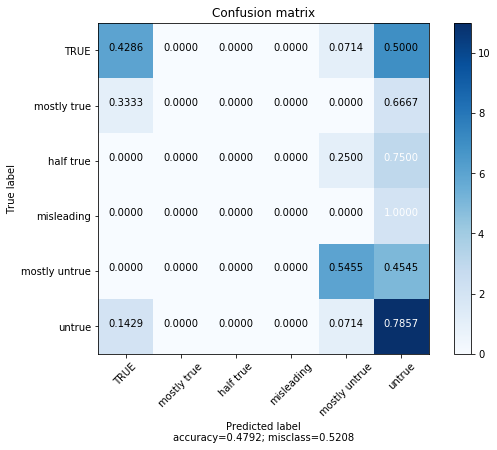

In [38]:
#confusion matrix
cm=confusion_matrix(y_test_convert, y_pred)
plot_confusion_matrix(cm,target_names=['TRUE','mostly true','half true','misleading','mostly untrue','untrue'])

In [303]:
#model.history.history['val_acc'] = model.history.history.pop('val_accuracy')


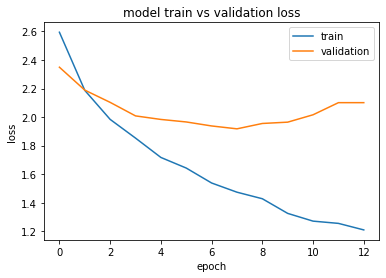

In [342]:
#
pyplot.plot(model.history.history['loss'])
pyplot.plot(model.history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [184]:
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovo = roc_auc_score(y_test_convert, Y_pred, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test_convert, Y_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test_convert, Y_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test_convert, Y_pred, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.492014 (macro),
0.529057 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.501988 (macro),
0.604604 (weighted by prevalence)


C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


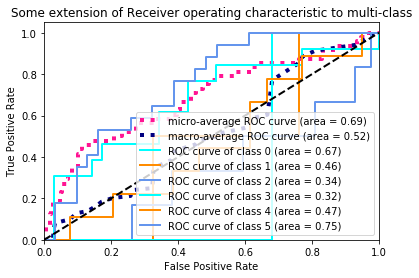

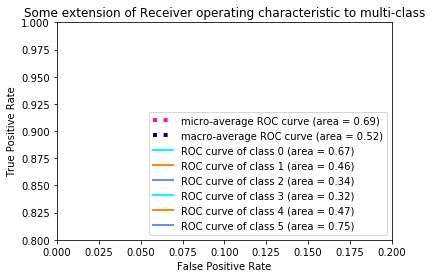

In [185]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

n_classes=6
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## hyperopt

In [16]:
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe


In [126]:
def create_model(X_train, y_train, X_test, y_test):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense({{uniform(20,100)}},activation=tf.nn.relu,input_shape=(100,),
                                    activity_regularizer=tf.keras.regularizers.l1({{uniform(0, 1)}}),
                                   kernel_regularizer=tf.keras.regularizers.l2({{uniform(0, 1)}})))
    
    model.add(tf.keras.layers.Dropout({{uniform(0, 1)}}))
              
    model.add(tf.keras.layers.Dense({{uniform(20,100)}},activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.l2({{uniform(0, 1)}}),
                                   activity_regularizer=tf.keras.regularizers.l1({{uniform(0, 1)}})))
              
    model.add(tf.keras.layers.Dropout({{uniform(0, 1)}}))
              
    model.add(tf.keras.layers.Dense(6,activation=tf.nn.softmax))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    
    
    result=model.fit(X_train,y_train,epochs=5,batch_size={{choice([8,16,32,64,128,256])}},validation_split=0.2)
    validation_acc = np.amax(result.history['val_accuracy']) 
    print('Best validation acc of epoch:', validation_acc)
    return {'loss': -validation_acc, 'status': STATUS_OK, 'model': model}

              
              
    return model

In [132]:
def data():
    original_full_ds = pd.read_pickle('full_ds_after_prepro.pkl')
    word2vec_model = word2vec.getModel()
    word2vec=original_full_ds['stmt_lemmas'].apply(lambda x : create_sentence_avg_vector(x,word2vec_model))
    dataset=pd.concat([original_full_ds,word2vec], axis=1)
    dst=dataset[dataset.columns[-100:]]
    label=dataset['score']
    dst_sq1 = dst.copy()
    label_sq1=label.copy()
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    dst_sq1 = scaler.fit_transform(dst_sq1)
    dst_sq1=pd.DataFrame(dst_sq1)
    dst_sq1=dst_sq1[:476]
    label_sq1=label_sq1[:476]
    X_train, X_test, y_train, y_test = train_test_split(dst_sq1, label_sq1, test_size=0.5)
    # one hot encoding for test and train labels

    #first convert label in train to numeric
    y_train=y_train.apply(lambda x: convert_score_cat_to_numeric(x))

    #convert to one hot encoding (train)
    y_train = tf.keras.utils.to_categorical(y_train)


    #first convert label in test to numeric
    y_test=y_test.apply(lambda x: convert_score_cat_to_numeric(x))

    #convert to one hot encoding (test)
    y_test = tf.keras.utils.to_categorical(y_test)


    return X_train, y_train, X_test, y_test

In [133]:
%%capture
best_run, best_model = optim.minimize(model=create_model,
                                      data=data,
                                      algo=tpe.suggest,
                                      max_evals=40,
                                      trials=Trials(),notebook_name='neuron_models')

In [134]:
print("Evalutation of best performing model:")
print(best_model.evaluate(X_test, y_test))
print("Best performing model chosen hyper-parameters:")
print(best_run)

Evalutation of best performing model:
48/48 [==============================] - 0s 5ms/sample - loss: 14.3201 - accuracy: 0.4167
[14.320125579833984, 0.41666666]
Best performing model chosen hyper-parameters:
{'Dense': 45.26811173865122, 'Dense_1': 75.04218055130701, 'batch_size': 0, 'l1': 0.11854044571155695, 'l1_1': 0.09743636039700224, 'l1_2': 0.21652113248455393, 'l1_3': 0.8001429718536348, 'l1_4': 0.38807129676348723, 'l1_5': 0.10280889083773402}


In [137]:
#stats on best_model
#convert y_test from one-hot encoded to categorical labels again
y_test_convert=numpy.argmax(y_test, axis=1, out=None)
#predict on test
Y_pred = best_model.predict(X_test)
#get the maximum val
y_pred = np.array([np.argmax(pred) for pred in Y_pred])

In [138]:
print('  Classification Report:\n',classification_report(y_test_convert,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         8
           4       0.67      0.22      0.33         9
           5       0.40      1.00      0.57        18

    accuracy                           0.42        48
   macro avg       0.21      0.24      0.18        48
weighted avg       0.27      0.42      0.28        48
 



## keras LSTM model 

In [854]:
input = Input(shape=(100,))
model = Embedding(2272,100,weights=[embedding_matrix],input_length=100)(input)
model = GaussianNoise(0.01)(model)
model = keras.layers.Dropout(0.2)(model)
model = Dense(256,activation = 'relu')(model)
#model = keras.layers.Dropout(0.6)(model)
#model =  LSTM (100,return_sequences=True,dropout=0.5,recurrent_dropout=0.1)(model)
#model = TimeDistributed(Dense(100,activation='relu'))(model)
model = keras.layers.Dropout(0.6)(model)
model = Flatten()(model)
model = GaussianNoise(0.01)(model)
#model = Dense(100,activation='relu')(model)
model = keras.layers.Dropout(0.6)(model)
output = Dense(6,activation='softmax')(model)
model = Model(input,output)
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [855]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=10, verbose=1)
model.fit(X_train,y_train,validation_split=0.2 ,nb_epoch = 800, verbose = 2)

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
C:\Users\Ben\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 304 samples, validate on 77 samples
Epoch 1/800
 - 1s - loss: 1.6267 - accuracy: 0.3684 - val_loss: 1.6134 - val_accuracy: 0.3766
Epoch 2/800
 - 1s - loss: 1.5125 - accuracy: 0.3947 - val_loss: 1.6065 - val_accuracy: 0.3766
Epoch 3/800
 - 1s - loss: 1.4752 - accuracy: 0.3947 - val_loss: 1.5858 - val_accuracy: 0.3766
Epoch 4/800
 - 1s - loss: 1.4406 - accuracy: 0.4211 - val_loss: 1.5872 - val_accuracy: 0.3766
Epoch 5/800
 - 1s - loss: 1.4154 - accuracy: 0.4145 - val_loss: 1.5667 - val_accuracy: 0.3766
Epoch 6/800
 - 1s - loss: 1.3762 - accuracy: 0.4178 - val_loss: 1.5807 - val_accuracy: 0.3766
Epoch 7/800
 - 1s - loss: 1.3126 - accuracy: 0.4737 - val_loss: 1.5864 - val_accuracy: 0.3766
Epoch 8/800
 - 1s - loss: 1.2702 - accuracy: 0.4934 - val_loss: 1.5663 - val_accuracy: 0.3766
Epoch 9/800
 - 1s - loss: 1.2189 - accuracy: 0.5197 - val_loss: 1.5847 - val_accuracy: 0.3766
Epoch 10/800
 - 1s - loss: 1.1481 - accuracy: 0.5461 - val_loss: 1.5891 - val_accuracy: 0.3766
Epoch 11/800
 

KeyboardInterrupt: 

In [856]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 87.139106


In [857]:
Y_pred = model.predict(X_train)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_train,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84        67
           1       0.89      0.73      0.80        33
           2       0.87      0.85      0.86        46
           3       1.00      1.00      1.00         5
           4       0.84      0.90      0.87        81
           5       0.85      0.95      0.90       149

    accuracy                           0.87       381
   macro avg       0.90      0.86      0.88       381
weighted avg       0.88      0.87      0.87       381
 



In [858]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 50.000000


In [859]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.12      0.12         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         2
           4       0.36      0.28      0.31        18
           5       0.59      0.78      0.67        54

    accuracy                           0.50        96
   macro avg       0.18      0.20      0.18        96
weighted avg       0.41      0.50      0.45        96
 



C:\Users\Ben\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


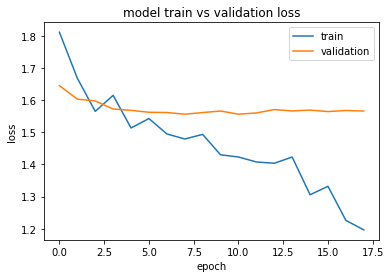

In [850]:
from matplotlib import pyplot
pyplot.plot(model.history.history['loss'])
pyplot.plot(model.history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [704]:
y_test

array([2, 0, 0, 5, 2, 1, 0, 5, 5, 0, 0, 5, 1, 4, 5, 2, 5, 5, 1, 5, 0, 4,
       4, 5, 5, 5, 4, 0, 4, 5, 0, 5, 1, 1, 5, 0, 5, 2, 4, 5, 0, 0, 0, 5,
       1, 2, 1, 5], dtype=int64)

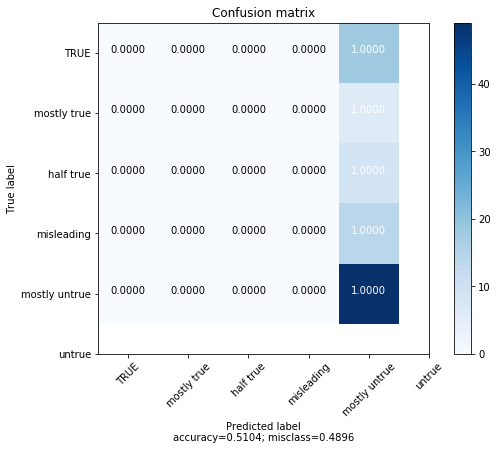

In [716]:

cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,target_names=['TRUE','mostly true','half true','misleading','mostly untrue','untrue'])

In [694]:
y_pred

array([0, 5, 1, 5, 0, 4, 0, 5, 5, 5, 0, 5, 5, 4, 5, 5, 5, 5, 5, 5, 0, 5,
       5, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 0, 5, 4, 4, 5, 5, 1, 5, 5,
       5, 5, 5, 2], dtype=int64)